In [1]:
#Import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from dotenv import load_dotenv
import os

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('train.csv')

In [3]:
# Clean Text
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)

    return text

print('\n')
print("Tweets Cleaned to Remove Extra Text. ie. retweets, links, etc")
print('/////////////////////////////////////////////////////////////')
df['Tweet'] = df['Tweet'].apply(cleanText)
print(df)




Tweets Cleaned to Remove Extra Text. ie. retweets, links, etc
/////////////////////////////////////////////////////////////
          Id                                              Tweet  following  \
0      10091  It's the everything else that's complicated. P...        0.0   
1      10172  Eren sent a glare towards Mikasa then nodded a...        0.0   
2       7012                  I posted a new photo to Facebook         0.0   
3       3697  jan Idiot Chelsea Handler Diagnoses Trump With...     3319.0   
4      10740  Pedophile Anthony Weiner is TERRIFIED of Getti...     4840.0   
...      ...                                                ...        ...   
11963   7866                                   11:11 meet harry        0.0   
11964   7841  If BBC Food disappears the loss of knowledge w...        0.0   
11965   9090  Look What Liberals Did to This Historic Monume...        0.0   
11966   6818  I uploaded a new track, "Everyday Lite 1", on ...        0.0   
11967   4937  Tr

In [4]:
# Create function for subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


# Apply functions on df
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

In [5]:
print("Subjectivity and Polarity of df")
print('////////////////////////////////')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.sample(n=3))

Subjectivity and Polarity of df
////////////////////////////////
        Id                                              Tweet  following  \
7867  9033      Eric Schmidt: 5 Fast Facts You Need to Know       4319.0   
9840  3034  thehill: Rosie ODonnell says she had surprise ...     1944.0   
6518  6059               wish that she'd notice all my effort        0.0   

      followers  actions  is_retweet                    location     Type  \
7867     3439.0  11218.0         0.0                Columbus, OH     Spam   
9840     2442.0  13039.0         1.0               United States     Spam   
6518        0.0      0.0         0.0  Legazpi City, Bicol Region  Quality   

      Subjectivity  Polarity  
7867           0.6       0.2  
9840           0.0       0.0  
6518           0.0       0.0  


In [6]:
# Create function for negative, neutral, and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

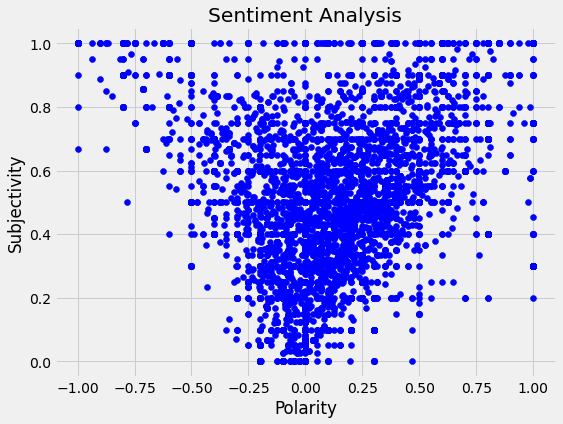

In [8]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    if(df['Type'][i] == "Spam"):
        plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color = 'Blue')
    else:
        plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

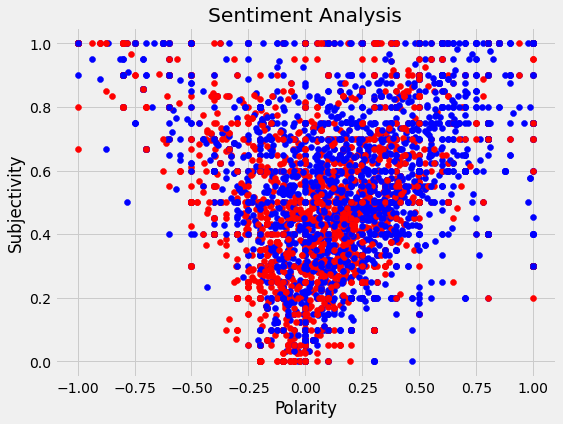

In [7]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    if(df['Type'][i] == "Spam"):
        plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color = 'Red')
    else:
        plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()